In [87]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedKFold

In [12]:
dados = pd.read_csv('Social_Network_Ads.csv')
dados.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [26]:
X = dados.iloc[:,0:-1].values
y = dados.iloc[:, -1].values

In [32]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([257, 143], dtype=int64))

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [42]:
classifier = RandomForestClassifier(n_estimators=100, random_state=1)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [52]:
y_pred = classifier.predict(X_test)

In [67]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[54,  4],
       [ 3, 19]], dtype=int64)

In [89]:
n_splits = 10 # Utilizadono último gráficopara mantesadivisão caso mude
scores = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = n_splits)  # cv = número de dobras, retorna uma lista com os resultados
print(f"Acurácia 10 testes: {scores.mean()*100:.2f}%")
print(f"Desvio padrão 10 testes: {scores.std()*100:.2f}%")

Acurácia 10 testes: 88.44%
Desvio padrão 10 testes: 5.94%


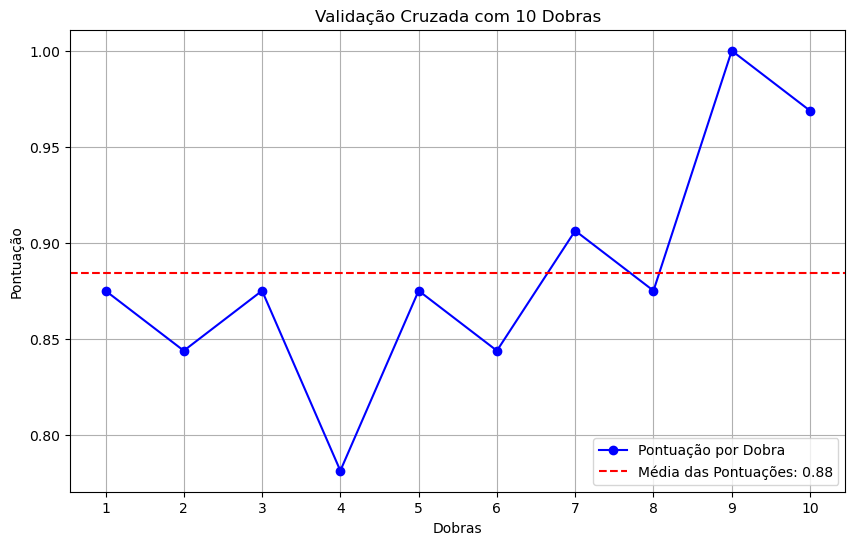

In [120]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(10, 6))

# Plota os scores para cada dobra, com marcadores e linha conectando os pontos
plt.plot(range(1, n_splits + 1), scores, marker='o', linestyle='-', color='b', label='Pontuação por Dobra')

# Adiciona uma linha horizontal que representa a média dos scores
plt.axhline(y=scores.mean(), color='r', linestyle='--', label=f'Média das Pontuações: {scores.mean():.2f}')

# Adiciona detalhes ao gráfico
plt.title('Validação Cruzada com 10 Dobras')  # Título do gráfico
plt.xlabel('Dobras')  # Rótulo do eixo X
plt.ylabel('Pontuação')  # Rótulo do eixo Y
plt.xticks(range(1, n_splits + 1))  # Define os ticks do eixo X de 1 a 10
plt.legend(loc='lower right')  # Adiciona a legenda no canto inferior direito
plt.grid(True)  # Ativa a grade no gráfico

# Exibe o gráfico
plt.show()